In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
import keras

In [5]:
keras.__version__

'2.15.0'

In [6]:
%pwd

'/content'

In [7]:
%cd /content/drive/MyDrive/Computer vision/data


/content/drive/MyDrive/Computer vision/data


In [8]:
%ls

'accuracy graph.png'   dog.4998.jpg                                  'Loss graph.png'   train/
 cat.4040.jpg         'Image Classification using Tensorflow.ipynb'   model_vgg16.h5    validation/


In [ ]:
#!unzip data.zip

In [9]:
# Import packages

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [10]:
%ls

'accuracy graph.png'   dog.4998.jpg                                  'Loss graph.png'   train/
 cat.4040.jpg         'Image Classification using Tensorflow.ipynb'   model_vgg16.h5    validation/


In [11]:
#set constant

IMAGE_SIZE = [224,224]

train_path = "train"
valid_path = "validation"

In [12]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [13]:
# Donwload vgg16 pretrained model

vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 4s 0us/step


In [14]:
for layer in vgg16.layers:
  print(layer)

In [15]:
#freezing all the weight
for layer in vgg16.layers:
  layer.trainable = False

In [16]:

for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
folder = glob("train/*")

In [19]:
folder

['train/cat', 'train/dog']

In [20]:
len(folder)

2

In [21]:
# Adding our custom dense layers

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [23]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

In [24]:
## data transformation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True

)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
%ls

'accuracy graph.png'   dog.4998.jpg                                  'Loss graph.png'   train/
 cat.4040.jpg         'Image Classification using Tensorflow.ipynb'   model_vgg16.h5    validation/


In [26]:
# lodaing train images

training_set = train_datagen.flow_from_directory(
    "train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 329 images belonging to 2 classes.


In [27]:
# lodaing test images

test_set = test_datagen.flow_from_directory(
    "validation",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 210 images belonging to 2 classes.


In [28]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)

)

Epoch 1/25
11/11 [==============================] - 218s 21s/step - loss: 2.7796 - accuracy: 0.6261 - val_loss: 0.7860 - val_accuracy: 0.6238
Epoch 2/25
11/11 [==============================] - 7s 648ms/step - loss: 0.3903 - accuracy: 0.8298 - val_loss: 0.5111 - val_accuracy: 0.7429
Epoch 3/25
11/11 [==============================] - 6s 529ms/step - loss: 0.2874 - accuracy: 0.8845 - val_loss: 0.2410 - val_accuracy: 0.8857
Epoch 4/25
11/11 [==============================] - 7s 635ms/step - loss: 0.1731 - accuracy: 0.9271 - val_loss: 0.2773 - val_accuracy: 0.8714
Epoch 5/25
11/11 [==============================] - 6s 578ms/step - loss: 0.1516 - accuracy: 0.9301 - val_loss: 0.2529 - val_accuracy: 0.8952
Epoch 6/25
11/11 [==============================] - 7s 592ms/step - loss: 0.1248 - accuracy: 0.9605 - val_loss: 0.3911 - val_accuracy: 0.8381
Epoch 7/25
11/11 [==============================] - 6s 539ms/step - loss: 0.0851 - accuracy: 0.9757 - val_loss: 0.3098 - val_accuracy: 0.8810
Epoch 

In [29]:
history.history

{'loss': [2.7796010971069336,
  0.39032116532325745,
  0.28742679953575134,
  0.17308269441127777,
  0.15161900222301483,
  0.12480384111404419,
  0.08507303893566132,
  0.05349098891019821,
  0.03313237801194191,
  0.040944039821624756,
  0.0535755380988121,
  0.03169919550418854,
  0.051463183015584946,
  0.03380165994167328,
  0.021995574235916138,
  0.021354850381612778,
  0.018892625346779823,
  0.017621604725718498,
  0.010323723778128624,
  0.01079991739243269,
  0.015312897972762585,
  0.007009614259004593,
  0.006740993354469538,
  0.006579805631190538,
  0.006515820976346731],
 'accuracy': [0.6261398196220398,
  0.8297872543334961,
  0.8844984769821167,
  0.9270516633987427,
  0.9300912022590637,
  0.9604862928390503,
  0.975683867931366,
  0.9908814430236816,
  0.996960461139679,
  0.9939209818840027,
  0.9848024249076843,
  0.9939209818840027,
  0.9878419637680054,
  0.9939209818840027,
  0.996960461139679,
  0.996960461139679,
  0.996960461139679,
  1.0,
  1.0,
  1.0,
  1.

In [30]:
import matplotlib.pyplot as plt

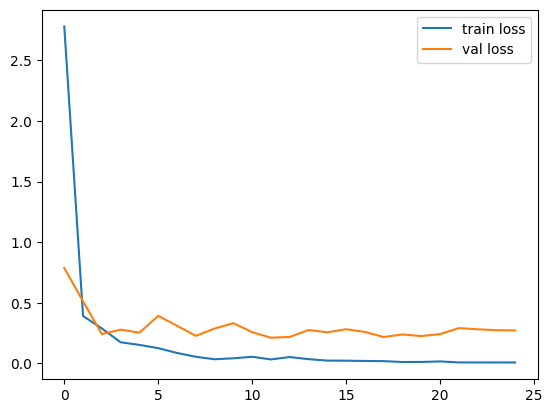

<Figure size 640x480 with 0 Axes>

In [31]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig("Loss graph")

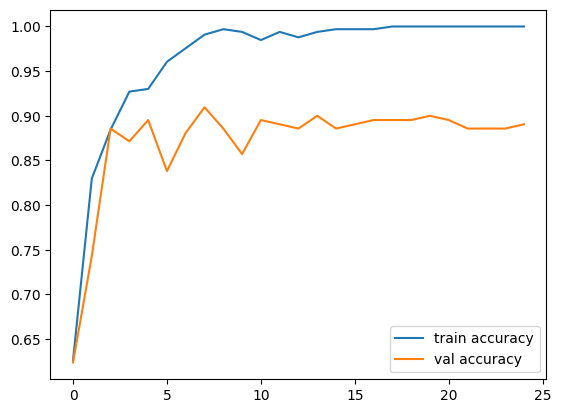

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig("accuracy graph")

In [33]:
## Save model
model.save("model_vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# load model

from tensorflow.keras.models import load_model

model=load_model('model_vgg16.h5')

In [35]:
y_pred = model.predict(test_set)

7/7 [==============================] - 1s 150ms/step


In [36]:
y_pred = np.argmax(y_pred, axis = 1)

In [37]:
%ls

'accuracy graph.png'   dog.4998.jpg                                  'Loss graph.png'   train/
 cat.4040.jpg         'Image Classification using Tensorflow.ipynb'   model_vgg16.h5    validation/


In [38]:
## load test image

image_name = "cat.4040.jpg"

In [39]:
from keras.preprocessing import image



In [40]:
img = image.load_img(image_name, target_size=(224,224))

In [41]:
x=image.img_to_array(img)

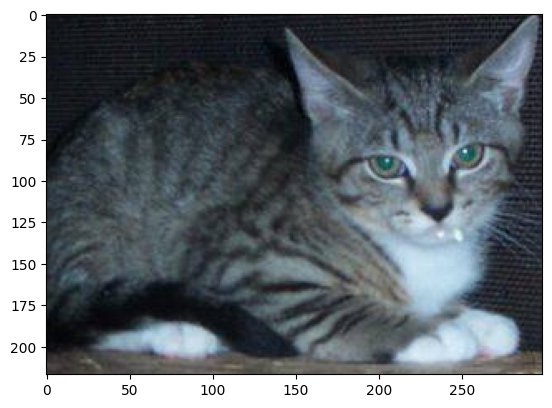

In [42]:
Z = plt.imread(image_name)
plt.imshow(Z)

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
from keras.applications.vgg16 import preprocess_input

In [46]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.99552476, 0.00447527]], dtype=float32)

In [48]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 18ms/step


In [49]:
result

array([0])

In [50]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
